In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [21]:
data = pd.read_csv("data/learningSet.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
numerical = data.select_dtypes(np.number)

In [24]:
display(numerical)

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


- Check for null values in the numerical columns.

In [25]:
show_nan(numerical)

The column AGE has 23665 NaN
The column NUMCHLD has 83026 NaN
The column INCOME has 21286 NaN
The column WEALTH1 has 44732 NaN
The column MBCRAFT has 52854 NaN
The column MBGARDEN has 52854 NaN
The column MBBOOKS has 52854 NaN
The column MBCOLECT has 52914 NaN
The column MAGFAML has 52854 NaN
The column MAGFEM has 52854 NaN
The column MAGMALE has 52854 NaN
The column PUBGARDN has 52854 NaN
The column PUBCULIN has 52854 NaN
The column PUBHLTH has 52854 NaN
The column PUBDOITY has 52854 NaN
The column PUBNEWFN has 52854 NaN
The column PUBPHOTO has 52854 NaN
The column PUBOPP has 52854 NaN
The column WEALTH2 has 43823 NaN
The column MSA has 132 NaN
The column ADI has 132 NaN
The column DMA has 132 NaN
The column ADATE_3 has 1950 NaN
The column ADATE_4 has 2191 NaN
The column ADATE_5 has 33590 NaN
The column ADATE_6 has 3557 NaN
The column ADATE_7 has 8874 NaN
The column ADATE_8 has 3511 NaN
The column ADATE_9 has 11245 NaN
The column ADATE_10 has 32748 NaN
The column ADATE_11 has 10422 Na

In [26]:
show_empty_variables(numerical)

In [27]:
"WEALTH1" in list(data.columns)

True

- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

- GEOCODE2

In [28]:
data["GEOCODE2"].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [29]:
m = data["GEOCODE2"].mode()

In [30]:
data[data["GEOCODE2"].isin(["", " "])] = m[0]

In [31]:
data["GEOCODE2"].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

- ADI

In [32]:
numerical["ADI"].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
601.0       1
161.0       1
147.0       1
103.0       1
Name: ADI, Length: 205, dtype: int64

In [33]:
numerical["ADI"].isna().sum()

132

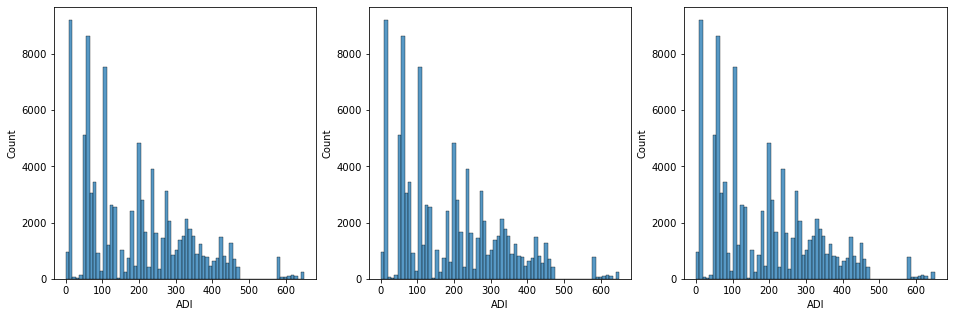

In [34]:
display_distr(numerical["ADI"])

In [35]:
m = numerical["ADI"].median()
m

175.0

In [36]:
numerical["ADI"] = numerical["ADI"].fillna(m)

<ipython-input-36-5fa31d9ce454>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["ADI"] = numerical["ADI"].fillna(m)


In [37]:
numerical["ADI"].isna().sum()

0

- DMA

In [38]:
numerical["DMA"].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
552.0       1
584.0       1
516.0       1
554.0       1
Name: DMA, Length: 207, dtype: int64

In [39]:
numerical["DMA"].isna().sum()

132

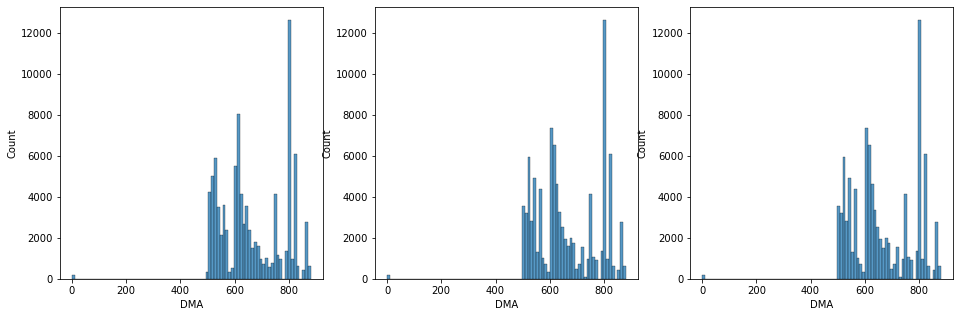

In [40]:
display_distr(numerical["DMA"])

In [41]:
m = numerical["DMA"].median()
m

635.0

In [42]:
numerical["DMA"] = numerical["DMA"].fillna(m)

<ipython-input-42-539a793b18b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["DMA"] = numerical["DMA"].fillna(m)


In [43]:
numerical["DMA"].isna().sum()

0

- MSA

In [44]:
numerical["MSA"].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
8003.0        1
1320.0        1
1950.0        1
5660.0        1
743.0         1
Name: MSA, Length: 299, dtype: int64

In [45]:
numerical["MSA"].isna().sum()

132

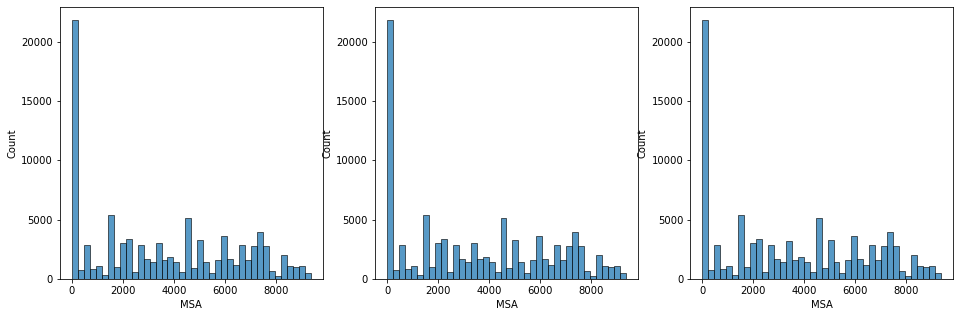

In [46]:
display_distr(numerical["MSA"])

In [47]:
m = numerical["MSA"].median()
m

3350.0

In [48]:
numerical["MSA"] = numerical["MSA"].fillna(m)

<ipython-input-48-1e32c578dcd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["MSA"] = numerical["MSA"].fillna(m)


In [49]:
numerical["MSA"].isna().sum()

0

- WEALTH1

In [50]:
numerical["WEALTH1"].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

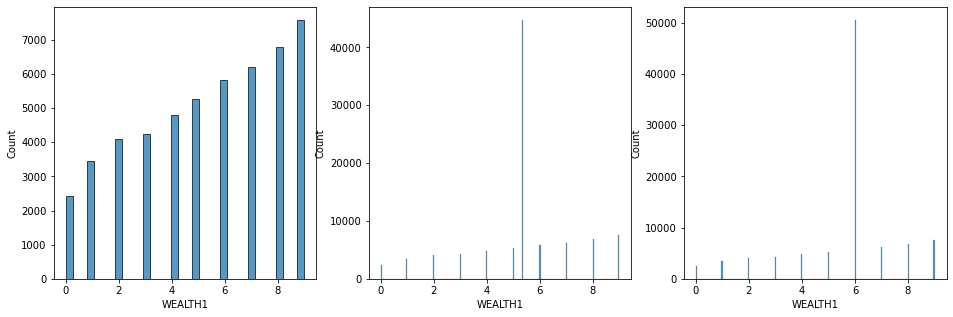

In [51]:
display_distr(numerical["WEALTH1"])

In [52]:
numerical_without_nan = drop_null_columns(numerical)

In [53]:
numerical_without_nan = pd.concat([numerical_without_nan,numerical['WEALTH1']], axis=1)

In [54]:
numerical_without_nan

,ODATEDW,TCODE,DOB,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,...,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,WEALTH1
0,8901,0,3712,0,0,39,34,18,10,2,...,10.0,9512,8911,7.741935,95515,0,0.0,0,4,NaN
1,9401,1,5202,16,0,15,55,11,6,2,...,25.0,9512,9310,15.666667,148535,0,0.0,0,2,9.0
2,9001,1,0,2,0,20,29,33,6,8,...,5.0,9512,9001,7.481481,15078,0,0.0,1,4,1.0
3,8701,0,2801,2,0,23,14,31,3,0,...,10.0,9512,8702,6.812500,172556,0,0.0,1,4,4.0
4,8601,0,2001,60,1,28,9,53,26,3,...,15.0,9601,7903,6.864865,7112,0,0.0,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,0,14,36,47,11,7,8,...,25.0,9602,9602,25.000000,184568,0,0.0,0,1,NaN
95408,9601,1,5001,1,0,31,43,19,4,1,...,20.0,9603,9603,20.000000,122706,0,0.0,1,1,9.0
95409,9501,1,3801,0,0,18,46,20,7,23,...,10.0,9610,9410,8.285714,189641,0,0.0,1,3,NaN
95410,8601,0,4005,0,0,28,35,20,9,1,...,18.0,9701,8612,12.146341,4693,1,18.0,1,4,NaN


In [55]:
rows_without_na = numerical_without_nan[numerical_without_nan['WEALTH1'].notna()].index
rows_with_na = numerical_without_nan[numerical_without_nan['WEALTH1'].isna()].index
numericals_with_wealth1 = numerical_without_nan[numerical_without_nan['WEALTH1'].notna()]
numericals_with_wealth1_na = numerical_without_nan[numerical_without_nan['WEALTH1'].isna()]

In [56]:
X_wealth1 = numericals_with_wealth1.drop(columns=["WEALTH1", "TARGET_B", "TARGET_D"])
y_wealth1 = numericals_with_wealth1[["WEALTH1"]]
X_wealth1_na = numericals_with_wealth1_na.drop(columns=["WEALTH1", "TARGET_B", "TARGET_D"])

In [57]:
X_wealth1

,ODATEDW,TCODE,DOB,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,...,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
1,9401,1,5202,16,0,15,55,11,6,2,...,9310,25.0,9512,25.0,9512,9310,15.666667,148535,0,2
2,9001,1,0,2,0,20,29,33,6,8,...,9111,16.0,9207,5.0,9512,9001,7.481481,15078,1,4
3,8701,0,2801,2,0,23,14,31,3,0,...,8711,11.0,9411,10.0,9512,8702,6.812500,172556,1,4
4,8601,0,2001,60,1,28,9,53,26,3,...,9310,15.0,9601,15.0,9601,7903,6.864865,7112,1,2
6,8701,0,6001,0,0,33,36,34,7,1,...,8705,12.0,9410,11.0,9504,8701,7.642857,62117,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95400,8801,2,1201,1,2,37,36,32,11,1,...,9503,15.0,8809,15.0,9511,8809,12.125000,38061,1,1
95401,9401,28,2801,2,0,33,33,47,5,14,...,9312,15.0,9511,15.0,9511,9312,9.666667,109741,1,1
95406,9001,0,4803,10,2,44,26,46,25,9,...,9602,9.0,9103,2.0,9602,9003,3.375000,35088,0,4
95408,9601,1,5001,1,0,31,43,19,4,1,...,9603,20.0,9603,20.0,9603,9603,20.000000,122706,1,1


In [58]:
X_wealth1_na

,ODATEDW,TCODE,DOB,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,...,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,8901,0,3712,0,0,39,34,18,10,2,...,9208,12.0,9402,10.0,9512,8911,7.741935,95515,0,4
5,9401,0,0,0,0,26,36,23,7,5,...,9407,16.0,9412,15.0,9506,9401,12.750000,47784,0,1
9,9401,1,3211,0,0,28,51,14,5,2,...,9309,15.0,9504,15.0,9504,9309,9.333333,49909,0,1
13,9201,1,0,0,0,27,37,28,10,10,...,9211,50.0,9412,25.0,9612,9210,20.416667,12890,0,1
17,8801,2,5201,0,0,30,35,27,4,4,...,8906,45.0,9512,45.0,9512,8801,25.000000,98090,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95404,9401,2,4506,0,0,24,31,28,9,9,...,9401,11.0,9508,8.0,9510,9310,5.900000,58178,0,4
95405,9201,28,0,0,0,41,12,69,7,1,...,9508,30.0,9412,25.0,9508,9305,26.666667,156106,0,1
95407,9601,1,0,0,14,36,47,11,7,8,...,9602,25.0,9602,25.0,9602,9602,25.000000,184568,0,1
95409,9501,1,3801,0,0,18,46,20,7,23,...,9603,10.0,9501,10.0,9610,9410,8.285714,189641,1,3


In [59]:
y_wealth1

,WEALTH1
1,9.0
2,1.0
3,4.0
4,2.0
6,6.0
...,...
95400,9.0
95401,8.0
95406,6.0
95408,9.0


In [60]:
scaler = MinMaxScaler()
scaler.fit(X_wealth1)
X_normalized_wealth1_np = scaler.transform(X_wealth1)
X_normalized_wealth1_df = pd.DataFrame(X_normalized_wealth1_np, columns=X_wealth1.columns)
X_normalized_wealth1_df

,ODATEDW,TCODE,DOB,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,...,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0.727273,0.000017,0.535736,0.066390,0.000000,0.151515,0.555556,0.111111,0.101695,0.020202,...,0.821494,0.020101,0.913321,0.025,0.045226,0.969489,0.028836,0.774510,0.0,0.333333
1,0.363636,0.000017,0.000000,0.008299,0.000000,0.202020,0.292929,0.333333,0.101695,0.080808,...,0.730874,0.011055,0.774179,0.005,0.045226,0.937311,0.012423,0.078617,1.0,1.000000
2,0.090909,0.000000,0.288465,0.008299,0.000000,0.232323,0.141414,0.313131,0.050847,0.000000,...,0.548725,0.006030,0.867245,0.010,0.045226,0.906175,0.011082,0.899764,1.0,1.000000
3,0.000000,0.000000,0.206076,0.248963,0.010417,0.282828,0.090909,0.535354,0.440678,0.030303,...,0.821494,0.010050,0.953923,0.015,0.492462,0.822972,0.011187,0.037079,1.0,0.333333
4,0.090909,0.000000,0.618023,0.000000,0.000000,0.333333,0.363636,0.343434,0.118644,0.010101,...,0.545993,0.007035,0.866788,0.011,0.005025,0.906071,0.012747,0.323895,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50675,0.181818,0.000034,0.123687,0.004149,0.020833,0.373737,0.363636,0.323232,0.186441,0.010101,...,0.909381,0.010050,0.592609,0.015,0.040201,0.917318,0.021734,0.198459,1.0,0.000000
50676,0.727273,0.000483,0.288465,0.008299,0.000000,0.333333,0.333333,0.474747,0.084746,0.141414,...,0.822404,0.010050,0.912865,0.015,0.040201,0.969697,0.016805,0.572224,1.0,0.000000
50677,0.363636,0.000000,0.494645,0.041494,0.020833,0.444444,0.262626,0.464646,0.423729,0.090909,...,0.954463,0.004020,0.726734,0.002,0.497487,0.937520,0.004189,0.182956,0.0,1.000000
50678,0.909091,0.000017,0.515036,0.004149,0.000000,0.313131,0.434343,0.191919,0.067797,0.010101,...,0.954918,0.015075,0.954836,0.020,0.502513,1.000000,0.037525,0.639828,1.0,0.000000


In [61]:
X_normalized_wealth1_np_na = scaler.transform(X_wealth1_na)
X_normalized_wealth1_df_na = pd.DataFrame(X_normalized_wealth1_np_na, columns=X_wealth1_na.columns)

In [62]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(pd.DataFrame(X_normalized_wealth1_df),pd.DataFrame(y_wealth1))
pred = knn.predict(X_normalized_wealth1_df) 

print("The accuracy of the model is: {:.2f}".format(accuracy_score(y_wealth1,pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the model is: 0.67


In [63]:
pred_na = knn.predict(X_normalized_wealth1_df_na)

In [65]:
numerical.loc[rows_with_na,"WEALTH1"] = pred_na

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
numerical["WEALTH1"].value_counts(dropna=False)

9.0    11604
2.0    10355
8.0    10215
6.0     9528
7.0     9510
3.0     9386
5.0     9310
4.0     9238
1.0     9107
0.0     7159
Name: WEALTH1, dtype: int64

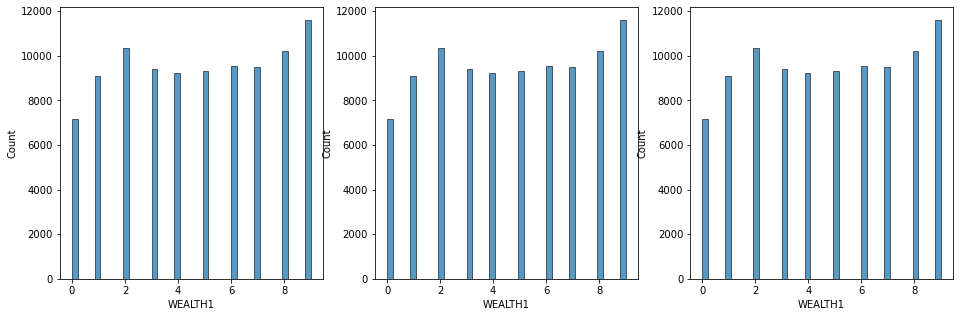

In [67]:
display_distr(numerical["WEALTH1"])

In [69]:
numerical.to_csv("data/cleaned_num_learningSet.csv")

In [236]:
# functions:

In [2]:
def show_nan(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            print("The column", col, "has", df[col].isna().sum(), "NaN" )

In [3]:
def show_empty_variables(df):
    columns = df.columns
    for col in columns:
        if len(df[df[col].isin(["", " "])][col].value_counts()) == 1:
            empty_amount = df[df[col].isin(["", " "])][col].value_counts()[0]
            percent_empty = np.round((empty_amount / df.shape[0])*100, 2)
            print("The column", col, "has", empty_amount, "empty strings which means", percent_empty, "%" )

In [4]:
def drop_null_columns(df):
    for col in df.columns:
        try:            
            if dict(df[col].isna().value_counts())[True] > 0:
                df = df.drop(columns=[col])
        except:
            df = df
            
    return df

In [5]:
def display_distr(df):
    fig, ax = plt.subplots(1,3,figsize=(16,5))
    sns.histplot(df, ax = ax[0])
    sns.histplot(df.fillna(np.mean(df)), ax = ax[1])
    sns.histplot(df.fillna(np.median(numerical[df.notna()][pd.DataFrame(df).columns[0]])),ax = ax[2])
    plt.show()
    